![This is an image](Quant-Trading.jpg)

<font size="3">
Please visit our website <a href="https://www.quant-trading.co" target="_blank">quant-trading.co</a> for more tools on quantitative finance and data science.
</font>

# **HOW TO MAKE A BOXPLOT FOR FINANCIAL RETURNS?**

## **Histogram**

<font size="3"> In descriptive statistics, a box plot or boxplot is a method for graphically demonstrating the locality, spread and skewness groups of numerical data through their quartiles. In this notebook we will show how to make a boxplot for financial returns. In addition to the box on a box plot, there can be lines (which are called whiskers) extending from the box indicating variability outside the upper and lower quartiles, thus, the plot is also called the box-and-whisker plot and the box-and-whisker diagram. Outliers that differ significantly from the rest of the dataset may be plotted as individual points beyond the whiskers on the box-plot. Box plots are non-parametric: they display variation in samples of a statistical population without making any assumptions of the underlying statistical distribution<br><br> 
    
<font size="3"> In this notebook we will use Yahoo Finance Data for the NVIDIA stock and then calculate monthly returns . Then we will classify them according to the month in the year and will later use the boxplot function from seaborn to plot the results. If you want to know how to download the data from the yahoo finance API please take a look  <a href="https://quant-trading.co/how-to-download-data-from-yahoo-finance-api/" target="_blank">here</a>
<br><br>

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import datetime
import yfinance as yf
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter, PercentFormatter

## **Download the data**

<font size="3"> We do as usual with the yahoo finance API. 
<br><br>

In [2]:
Ticker = '^SPX'
my_ticker = yf.Ticker(Ticker)

#DATES
start_date = datetime.datetime(1970, 12, 31)
end_date = datetime.datetime(2024, 4, 15)

prices_hist = my_ticker.history(start=start_date,end=end_date)

## **Calculate monthly returns**

<font size="3"> In another notebook we showed how to do this in detail. Please look at this  <a href="https://quant-trading.co/mean-and-median-return-calculations-using-python/" target="_blank">link</a>
<br><br>

In [3]:
prices_hist_month = prices_hist.resample('M')
prices_hist_month = prices_hist_month.apply(lambda x : x.iloc[-1])
prices_hist_month['Monthly_Return'] = prices_hist_month['Close']/prices_hist_month['Close'].shift(1) - 1
prices_hist_month['Date'] = prices_hist_month.index
prices_hist_month['Date'] = pd.to_datetime(prices_hist_month['Date'])
prices_hist_month['Month'] = prices_hist_month['Date'].dt.month
prices_hist_month

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Monthly_Return,Date,Month
Date,,,,,,,,,,
1970-12-31,0.000000,92.790001,91.360001,92.150002,13390000,0,0,NaN,1970-12-31,12
1971-01-31,0.000000,96.489998,94.790001,95.879997,20960000,0,0,0.040477,1971-01-31,1
1971-02-28,0.000000,97.540001,95.839996,96.750000,17250000,0,0,0.009074,1971-02-28,2
1971-03-31,0.000000,101.050003,99.690002,100.309998,17610000,0,0,0.036796,1971-03-31,3
1971-04-30,0.000000,104.959999,103.250000,103.949997,17490000,0,0,0.036288,1971-04-30,4
...,...,...,...,...,...,...,...,...,...,...
2023-12-31,4782.879883,4788.430176,4751.990234,4769.830078,3126060000,0,0,0.044229,2023-12-31,12
2024-01-31,4899.189941,4906.750000,4845.149902,4845.649902,4696120000,0,0,0.015896,2024-01-31,1
2024-02-29,5085.359863,5104.990234,5061.890137,5096.270020,5219740000,0,0,0.051721,2024-02-29,2


## **Calculate maximum and minimum return**

<font size="3"> Here we calculate maximum and minimum return to adjust the chart. We also track the initial year of the database for the chart's title.
<br><br>

In [4]:
min_value = prices_hist_month['Monthly_Return'].min()
max_value = prices_hist_month['Monthly_Return'].max()

prices_hist_month['Year'] = prices_hist_month['Date'].dt.year
prices_hist_month['Year'].iloc[0]

1970

## **Create the boxplot**

   
<font size="3"> We will use the boxplot function of the seaborn library. Below you can find an example on how to do that.
<br><br>

Text(9, -0.21763041421998008, 'Source: Yahoo Finance')

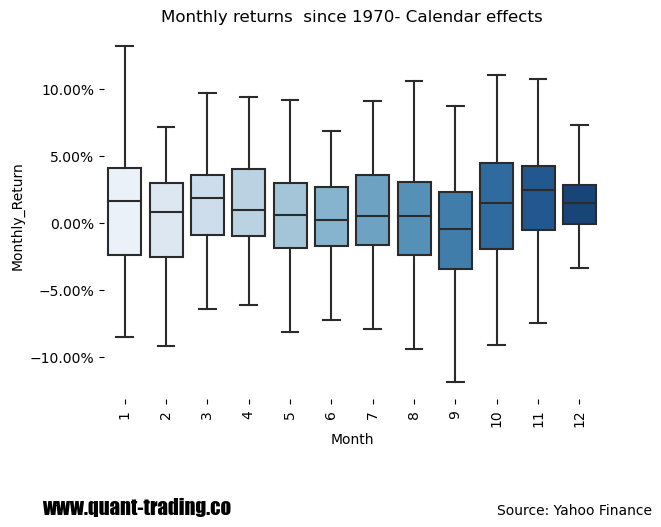

In [5]:
fig = plt.figure()

ax = sns.boxplot(x = 'Month', y = 'Monthly_Return', data  = prices_hist_month, orient="vertical", showfliers=False, palette="Blues") 
ax.yaxis.set_major_formatter(PercentFormatter(1,decimals=2))
plt.xticks(rotation=90)
plt.title("Monthly returns  since " + str(prices_hist_month['Year'].iloc[0]) + "- Calendar effects")
plt.box(on=None)

plt.text(-2, min_value,'www.quant-trading.co' , color='black', fontsize=15,family='Impact')
plt.text(9, min_value,'Source: Yahoo Finance' , color='black', fontsize=10)

## **Test if the means are equal**

   
<font size="3"> From a visual inspection the month with the lowest mean return seems to be september. On the other hand, the month with the highest mean return seems to be november. We can run an statistical test to see if those means are different. Below we show how to do that. Since the p-value is very low (below 0.05) it means the results are significant, and we can conclude that the mean returns of september and november are indeed different from an statistical point of view.
<br><br>

In [6]:
#### A simple t test for difference of means
t2, p2 = stats.ttest_ind(prices_hist_month.loc[prices_hist_month['Month'] == 9, 'Monthly_Return'],
                         prices_hist_month.loc[prices_hist_month['Month'] == 11, 'Monthly_Return']
                         )


print("t = " + str(t2))
print("p = " + str(p2))

t = -3.043023116128223
p = 0.0029657084412194707


If this content is helpful and you want to make a donation please click on the button below. It helps us maintain this site.

[![paypal](https://www.paypalobjects.com/en_US/i/btn/btn_donateCC_LG.gif)](https://www.paypal.com/cgi-bin/webscr?cmd=_s-xclick&hosted_button_id=29CVY97MEQ9BY)